In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import xgi
import networkx as nx
from governance import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import cProfile
import math

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
num_decisions = 6
num_people = 500

select_decision_type = "random"
select_group_type = "star"
make_decision_type = "average"
update_opinions_type = "star"

In [18]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 0
satisfaction_0 = np.zeros((len(densities),num_samples))
satisfiability_0 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        #opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_0[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_0[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_0[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [19]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 1
satisfaction_1 = np.zeros((len(densities),num_samples))
satisfiability_1 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        #opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_1[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_1[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_1[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [20]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 2
satisfaction_2 = np.zeros((len(densities),num_samples))
satisfiability_2 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        #opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_2[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_2[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_2[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [21]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 3
satisfaction_3 = np.zeros((len(densities),num_samples))
satisfiability_3 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        #opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_3[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_3[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_3[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [22]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 4
satisfaction_4 = np.zeros((len(densities),num_samples))
satisfiability_4 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        #opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_4[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_4[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_4[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [23]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 5
satisfaction_5 = np.zeros((len(densities),num_samples))
satisfiability_5 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        #opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_5[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_5[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_5[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [15]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 6
satisfaction_6 = np.zeros((len(densities),num_samples))
satisfiability_6 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        #opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_6[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_6[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_6[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [16]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 7
satisfaction_7 = np.zeros((len(densities),num_samples))
satisfiability_7 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        #opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_7[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_7[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_7[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [17]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 8
satisfaction_8 = np.zeros((len(densities),num_samples))
satisfiability_8 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        #opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_8[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_8[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_8[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [18]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 9
satisfaction_9 = np.zeros((len(densities),num_samples))
satisfiability_9 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        #opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_9[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_9[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_9[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [24]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 10
satisfaction_10 = np.zeros((len(densities),num_samples))
satisfiability_10 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        #opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_10[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_10[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_10[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [20]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 15
satisfaction_15 = np.zeros((len(densities),num_samples))
satisfiability_15 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        #opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_15[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_15[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_15[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [4]:
densities = np.loadtxt("Simulations/random_network_greedy_densities.csv", delimiter=",")
satisfaction_0 = np.loadtxt("Simulations/random_network_greedy_sat_overlap0.csv", delimiter=",")
satisfaction_1 = np.loadtxt("Simulations/random_network_greedy_sat_overlap1.csv", delimiter=",")
satisfaction_2 = np.loadtxt("Simulations/random_network_greedy_sat_overlap2.csv", delimiter=",")
satisfaction_3 = np.loadtxt("Simulations/random_network_greedy_sat_overlap3.csv", delimiter=",")
satisfaction_4 = np.loadtxt("Simulations/random_network_greedy_sat_overlap4.csv", delimiter=",")
satisfaction_5 = np.loadtxt("Simulations/random_network_greedy_sat_overlap5.csv", delimiter=",")
satisfaction_10 = np.loadtxt("Simulations/random_network_greedy_sat_overlap10.csv", delimiter=",")
satisfiability_0= np.loadtxt("Simulations/random_network_greedy_coh_overlap0.csv", delimiter=",")
satisfiability_1 = np.loadtxt("Simulations/random_network_greedy_coh_overlap1.csv", delimiter=",")
satisfiability_2 = np.loadtxt("Simulations/random_network_greedy_coh_overlap2.csv", delimiter=",")
satisfiability_3 = np.loadtxt("Simulations/random_network_greedy_coh_overlap3.csv", delimiter=",")
satisfiability_4 = np.loadtxt("Simulations/random_network_greedy_coh_overlap4.csv", delimiter=",")
satisfiability_5 = np.loadtxt("Simulations/random_network_greedy_coh_overlap5.csv", delimiter=",")
satisfiability_10 = np.loadtxt("Simulations/random_network_greedy_coh_overlap10.csv", delimiter=",")

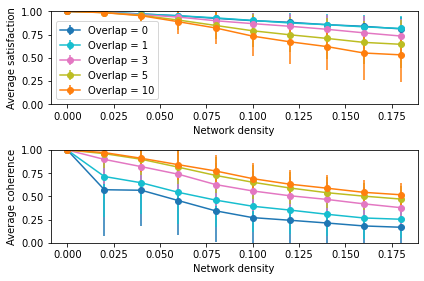

In [5]:
plt.figure()
plt.subplot(212)
plt.errorbar(densities, satisfiability_0.mean(axis=1), yerr=satisfiability_0.std(axis=1), color="tab:blue", marker="o",label='Overlap = 0')
plt.errorbar(densities, satisfiability_1.mean(axis=1), yerr=satisfiability_1.std(axis=1), color="tab:cyan", marker="o",label='Overlap = 1')
plt.errorbar(densities, satisfiability_3.mean(axis=1), yerr=satisfiability_3.std(axis=1), color="tab:pink", marker="o",label='Overlap = 3')
plt.errorbar(densities, satisfiability_5.mean(axis=1), yerr=satisfiability_5.std(axis=1), color="tab:olive", marker="o",label='Overlap = 5')
plt.errorbar(densities, satisfiability_10.mean(axis=1), yerr=satisfiability_10.std(axis=1), color="tab:orange", marker="o",label='Overlap = 10')
plt.ylabel("Average coherence")
plt.xlabel("Network density")
plt.ylim((0,1))
plt.subplot(211)
plt.errorbar(densities, satisfaction_0.mean(axis=1), yerr=satisfaction_0.std(axis=1), color="tab:blue", marker="o",label='Overlap = 0')
plt.errorbar(densities, satisfaction_1.mean(axis=1), yerr=satisfaction_1.std(axis=1), color="tab:cyan", marker="o",label='Overlap = 1')
plt.errorbar(densities, satisfaction_3.mean(axis=1), yerr=satisfaction_3.std(axis=1), color="tab:pink", marker="o",label='Overlap = 3')
plt.errorbar(densities, satisfaction_5.mean(axis=1), yerr=satisfaction_5.std(axis=1), color="tab:olive", marker="o",label='Overlap = 5')
plt.errorbar(densities, satisfaction_10.mean(axis=1), yerr=satisfaction_10.std(axis=1), color="tab:orange", marker="o",label='Overlap = 10')
plt.ylabel("Average satisfaction")
plt.xlabel("Network density")
plt.ylim((0,1))
plt.legend()
plt.tight_layout()
plt.savefig("Figures/random_networks_greedy.png", dpi=1000)
plt.savefig("Figures/random_networks_greedy.pdf")
plt.show()

In [9]:
print(satisfiability_0[-1,:].std())

0.2189204022617905


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


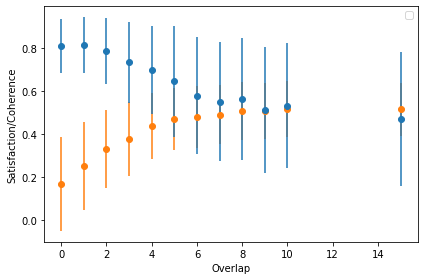

In [21]:
plt.figure()
plt.errorbar(0, satisfiability_0[-1,:].mean(), yerr=satisfiability_0[-1,:].std(), color="tab:orange", marker="o")
plt.errorbar(1, satisfiability_1[-1,:].mean(), yerr=satisfiability_1[-1,:].std(), color="tab:orange", marker="o")
plt.errorbar(2, satisfiability_2[-1,:].mean(), yerr=satisfiability_2[-1,:].std(), color="tab:orange", marker="o")
plt.errorbar(3, satisfiability_3[-1,:].mean(), yerr=satisfiability_3[-1,:].std(), color="tab:orange", marker="o")
plt.errorbar(4, satisfiability_4[-1,:].mean(), yerr=satisfiability_4[-1,:].std(), color="tab:orange", marker="o")
plt.errorbar(5, satisfiability_5[-1,:].mean(), yerr=satisfiability_5[-1,:].std(), color="tab:orange", marker="o")
plt.errorbar(6, satisfiability_6[-1,:].mean(), yerr=satisfiability_6[-1,:].std(), color="tab:orange", marker="o")
plt.errorbar(7, satisfiability_7[-1,:].mean(), yerr=satisfiability_7[-1,:].std(), color="tab:orange", marker="o")
plt.errorbar(8, satisfiability_8[-1,:].mean(), yerr=satisfiability_8[-1,:].std(), color="tab:orange", marker="o")
plt.errorbar(9, satisfiability_9[-1,:].mean(), yerr=satisfiability_9[-1,:].std(), color="tab:orange", marker="o")
plt.errorbar(10, satisfiability_10[-1,:].mean(), yerr=satisfiability_10[-1,:].std(), color="tab:orange", marker="o")
plt.errorbar(15, satisfiability_15[-1,:].mean(), yerr=satisfiability_15[-1,:].std(), color="tab:orange", marker="o")
plt.errorbar(0, satisfaction_0[-1,:].mean(), yerr=satisfaction_0[-1,:].std(), color="tab:blue", marker="o")
plt.errorbar(1, satisfaction_1[-1,:].mean(), yerr=satisfaction_1[-1,:].std(), color="tab:blue", marker="o")
plt.errorbar(2, satisfaction_2[-1,:].mean(), yerr=satisfaction_2[-1,:].std(), color="tab:blue", marker="o")
plt.errorbar(3, satisfaction_3[-1,:].mean(), yerr=satisfaction_3[-1,:].std(), color="tab:blue", marker="o")
plt.errorbar(4, satisfaction_4[-1,:].mean(), yerr=satisfaction_4[-1,:].std(), color="tab:blue", marker="o")
plt.errorbar(5, satisfaction_5[-1,:].mean(), yerr=satisfaction_5[-1,:].std(), color="tab:blue", marker="o")
plt.errorbar(6, satisfaction_6[-1,:].mean(), yerr=satisfaction_6[-1,:].std(), color="tab:blue", marker="o")
plt.errorbar(7, satisfaction_7[-1,:].mean(), yerr=satisfaction_7[-1,:].std(), color="tab:blue", marker="o")
plt.errorbar(8, satisfaction_8[-1,:].mean(), yerr=satisfaction_8[-1,:].std(), color="tab:blue", marker="o")
plt.errorbar(9, satisfaction_9[-1,:].mean(), yerr=satisfaction_9[-1,:].std(), color="tab:blue", marker="o")
plt.errorbar(10, satisfaction_10[-1,:].mean(), yerr=satisfaction_10[-1,:].std(), color="tab:blue", marker="o")
plt.errorbar(15, satisfaction_15[-1,:].mean(), yerr=satisfaction_15[-1,:].std(), color="tab:blue", marker="o")
plt.ylabel("Satisfaction/Coherence")
plt.xlabel("Overlap")
plt.legend()
plt.tight_layout()
plt.savefig("Figures/random_networks_summary.png", dpi=1000)
plt.savefig("Figures/random_networks_summary.pdf")
plt.show()

## 

In [ ]:
np.savetxt("Simulations/random_network_greedy_densities.csv", densities, delimiter=",")
np.savetxt("Simulations/random_network_greedy_sat_overlap0.csv", satisfaction_0, delimiter=",")
np.savetxt("Simulations/random_network_greedy_sat_overlap1.csv", satisfaction_1, delimiter=",")
np.savetxt("Simulations/random_network_greedy_sat_overlap2.csv", satisfaction_2, delimiter=",")
np.savetxt("Simulations/random_network_greedy_sat_overlap3.csv", satisfaction_3, delimiter=",")
np.savetxt("Simulations/random_network_greedy_sat_overlap4.csv", satisfaction_4, delimiter=",")
np.savetxt("Simulations/random_network_greedy_sat_overlap5.csv", satisfaction_5, delimiter=",")
np.savetxt("Simulations/random_network_greedy_sat_overlap10.csv", satisfaction_10, delimiter=",")
np.savetxt("Simulations/random_network_greedy_coh_overlap0.csv", satisfiability_0, delimiter=",")
np.savetxt("Simulations/random_network_greedy_coh_overlap1.csv", satisfiability_1, delimiter=",")
np.savetxt("Simulations/random_network_greedy_coh_overlap2.csv", satisfiability_2, delimiter=",")
np.savetxt("Simulations/random_network_greedy_coh_overlap3.csv", satisfiability_3, delimiter=",")
np.savetxt("Simulations/random_network_greedy_coh_overlap4.csv", satisfiability_4, delimiter=",")
np.savetxt("Simulations/random_network_greedy_coh_overlap5.csv", satisfiability_5, delimiter=",")
np.savetxt("Simulations/random_network_greedy_coh_overlap10.csv", satisfiability_10, delimiter=",")